# Predicting Credit Card Defaults

## Jeremy Locatelli, Erik Ring-Walters, Andrea Cano
***

# Introduction
This markdown is going to explore the data of a credit card csv. The data provides details on a subjects spousal information, age, education, sex, balance, payments, and whether they have defaulted. Using these categories we hope to predict what influences an individual to default. Using multiple algorithms to find the best predictors we will try and visualize the accuracy

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [2]:
dat = pd.read_csv('default_cc_train.csv')
dat.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

***
## Data Exploration

In [3]:
sns.set(rc={'axes.facecolor':'#ffffff', 'figure.facecolor':'white'})
sns.set_style("whitegrid");

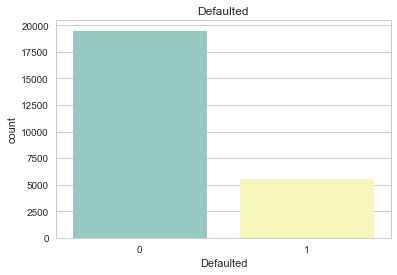

In [4]:
sns.countplot("default.payment.next.month", data=dat,palette="Set3")
plt.title("Defaulted")
plt.xlabel("Defaulted");

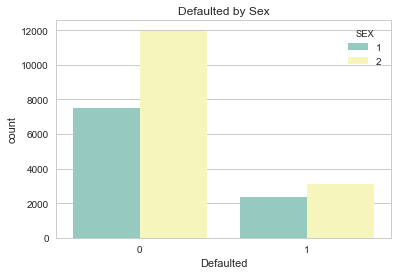

In [5]:
sns.countplot("default.payment.next.month", data=dat, hue="SEX",palette="Set3")
plt.title("Defaulted by Sex")
plt.xlabel("Defaulted");

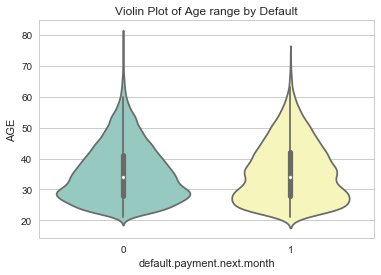

In [6]:
sns.violinplot("default.payment.next.month","AGE", data=dat, palette="Set3")
plt.title("Violin Plot of Age range by Default");

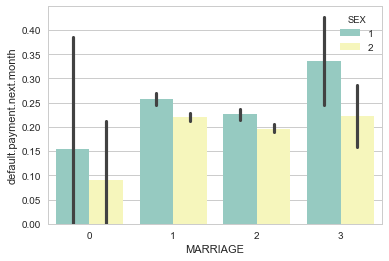

In [7]:
violin = sns.barplot(x="MARRIAGE",y="default.payment.next.month", hue="SEX", data=dat, palette="Set3")

Text(0.5,1,'Age by ___')

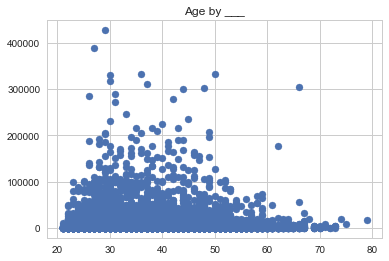

In [8]:
scatter = plt.scatter(x="AGE",y="PAY_AMT5", data=dat)
plt.title('Age by ___')

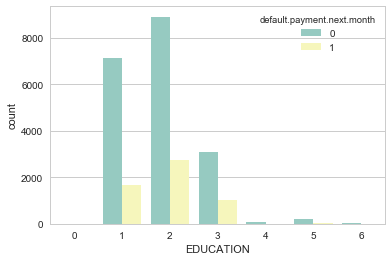

In [9]:
edu = sns.countplot(x="EDUCATION", hue="default.payment.next.month", data=dat, palette="Set3")

## Preprocessing

In [10]:
#Getting rid of 0's in Marriage
dat = dat[dat.MARRIAGE != 0]

#getting rid of 0,5,6 in Education
for i in [0,5,6]:
    dat = dat[dat.EDUCATION != i]


In [11]:
X = dat.loc[:, dat.columns != "default.payment.next.month"]
y  = dat.iloc[:,24]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33)

# Preform Grid Search on SVC 
# parameters = {'C':[1, 10]}
svm = SVC()
# clf = GridSearchCV(svm,parameters)

# Training and predictions for Grid Searched SVC
svm.fit(X_train,y_train)
predicts = svm.predict(X_test)
accuracy = accuracy_score(y_test,predicts)
print("The accuracy of our Support Vector Classifier is: " + str(accuracy))

The accuracy of our Support Vector Classifier is: 0.7768361581920904
